In [2]:
import utils
from global_land_mask import globe
from geopy.distance import geodesic
import numpy as np

In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from '/mnt/h/Documents/fifth_year_shit/math441/project/utils.py'>

# Straight line model

Consider any point that is on land

91
69


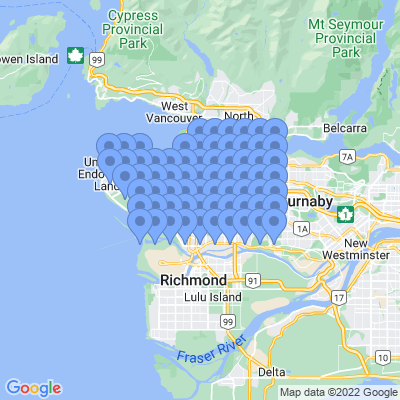

In [4]:
test_problem_points = utils.equidistant_points()
print(len(test_problem_points))
# display(utils.get_map(test_problem_center, markers=[("blue", test_problem_points)], zoom=10))
test_problem_points = list(filter(lambda p: globe.is_land(p[0], p[1]), test_problem_points))
print(len(test_problem_points))
display(utils.get_map(utils.vancouver_center, markers=[("blue", test_problem_points)], zoom=10))

A point covers another point if the distance between them is less than 3 km

In [5]:
def make_set_covering_problem_straight_line(positions):
    print(f"Creating set covering matrix (n = {len(positions)}) (straight line distances)")
    covering_matrix = np.array([])
    for start in positions:
        covered = []
        for other in positions:
            if geodesic(start, other).kilometers < 3.0:
                covered.append(1)
            else:
                covered.append(0)
        covering_matrix = np.hstack((covering_matrix, covered))
    return covering_matrix.reshape(len(positions), len(positions))

In [6]:
matrix = make_set_covering_problem_straight_line(test_problem_points)
solution = utils.set_covering_linprog_solver(test_problem_points, matrix)

Creating set covering matrix (n = 69) (straight line distances)


In [7]:
print(f"Locations used: {len(solution)}")

Locations used: 9


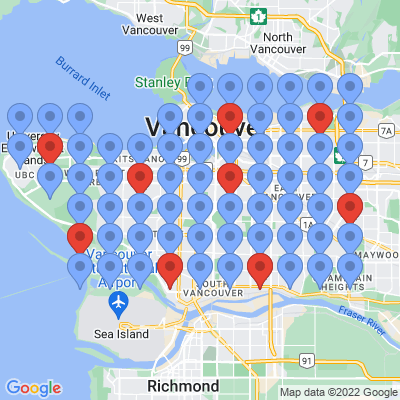

In [8]:
utils.display_solution(utils.vancouver_center, test_problem_points, solution, show_coverage=False)

In [9]:
hospitals = [test_problem_points[i] for i in solution]
uniform_eval = utils.uniform_random_evaluate_solution(hospitals)
population_eval = utils.population_sample_evaluate_solution(hospitals)
senior_eval = utils.senior_population_sample_evaluate_solution(hospitals)
balanced_eval = utils.balanced_sample_evaluate_solution(hospitals)
results = (uniform_eval, population_eval, senior_eval, balanced_eval)
print(f"model name => uniform sample, density sample, senior population sample, balanced sample")
print(f"straight_line_set_covering => {[round(r[0],3) for r in results]}")

model name => uniform sample, density sample, senior population sample, balanced sample
straight_line_set_covering => [1.74, 1.673, 1.706, 1.657]
